<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dicionário-de-dados" data-toc-modified-id="Dicionário-de-dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dicionário de dados</a></span></li><li><span><a href="#Limpeza-e-tratamento-dos-dados" data-toc-modified-id="Limpeza-e-tratamento-dos-dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Limpeza e tratamento dos dados</a></span><ul class="toc-item"><li><span><a href="#Dados-duplicados" data-toc-modified-id="Dados-duplicados-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dados duplicados</a></span></li><li><span><a href="#Dados-ausentes" data-toc-modified-id="Dados-ausentes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dados ausentes</a></span></li></ul></li></ul></div>

# Introdução

O conjunto de dados ChoiceBehaviour.csv contém informações sobre a escolha de um agricultor em relação ao aluguel de maquinaria oferecida por uma mesma companhia. Os dados abrangem 4910 agricultores que precisavam decidir entre três opções de máquinas para aluguel, além da possibilidade de não alugar nenhuma delas. Esses dados simulados são compostos por 11 atributos. 

O analista da companhia possui informações relevantes sobre o cliente, como a região de residência do agricultor, os custos de aluguel de cada máquina oferecida, o custo do produto e o preço da máquina base. Porém, essas informações são desconhecidas pelo agricultor. Por sua vez, o agricultor tem acesso apenas à informação do custo para a reparação e aos preços de aluguel das máquinas oferecidas.

Nessa fase inicial de análise, nosso objetivo é compreender as variáveis disponíveis e o problema em questão, a fim de explorar possíveis abordagens sob a perspectiva da empresa. Essa análise mais aprofundada das informações nos ajudará a tomar decisões estratégicas e embasadas, visando otimizar o processo de aluguel de máquinas oferecidas aos trabalhadores rurais.

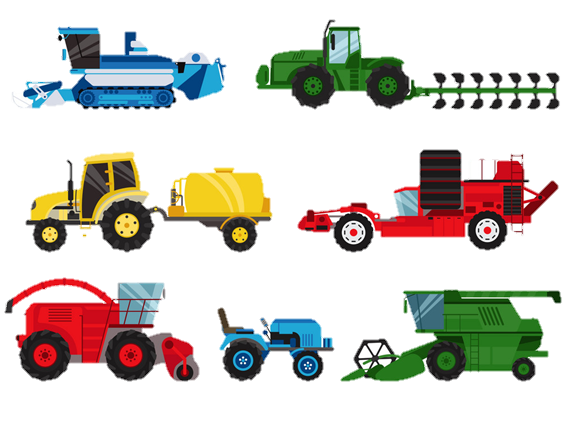

In [13]:
from IPython.display import Image
Image("data/maquinas.png")

## Dicionário de dados

A seguir, ilustramos o dicionário desses dados:

- Regiao: Local onde o agricultor reside.
- Prima: Valor que o agricultor precisa pagar para a reparação da máquina.
- CustoProduto: Custo estimado da maquinaria no momento do aluguel para o agricultor.
- Pmáquinabase: Preço do aluguel da máquina base para dar cobertura ao assegurado.
- Pmáquina1: Preço do aluguel da máquina 1 oferecido ao agricultor.
- Pmáquina2: Preço do aluguel da máquina 2 oferecido ao agricultor.
- Pmáquina3: Preço do aluguel da máquina 3 oferecido ao agricultor.
- Cmáquina1: Custo do aluguel da máquina 1 oferecido ao agricultor.
- Cmáquina2: Custo do aluguel da máquina 2 oferecido ao agricultor.
- Cmáquina3: Custo do aluguel da máquina 3 oferecido ao agricultor.
- Resposta: Indicador da escolha do agricultor, sendo 1 para aluguel da máquina 1, 2 para aluguel da máquina 2, 3 para aluguel da máquina 3 e 0 para o caso em que o agricultor decide não alugar nenhuma máquina oferecida.
- Resposta2: Outro indicador da escolha do agricultor, onde 1 representa o aluguel de uma máquina e 0 indica que o agricultor não alugou nenhuma máquina.

Esses dados oferecem insights valiosos sobre o comportamento de escolha dos agricultores em relação às opções de aluguel de maquinaria. Através de análises e modelos estatísticos, é possível explorar padrões e tomar decisões informadas para otimizar o processo de locaçao dessas máquinas.

# Importação das bibliotecas e leitura dos dados

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%pip install catboost
import catboost as cb
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import random
random.seed(5143023)
# from google.colab import drive
import os

# drive.mount('/content/gdrive/', force_remount=True)
# path = '/content/gdrive/MyDrive/7º Semestre/Mineração/Desafio 2'

# os.chdir(path= path)
data = pd.read_excel("data/ChoiceBehaviour.xlsx", dtype={'Regiao':str, 'Id': str, 'Resposta': str})

Note: you may need to restart the kernel to use updated packages.


In [3]:
print(f"O dataframe possui {data.shape[0]} linhas e {data.shape[1]} colunas.")
data.head()

O dataframe possui 4910 linhas e 12 colunas.


,Id,Regiao,Prima,CustoProduto,Pmaquinabase,Pmaquina1,Pmaquina2,Pmaquina3,Cmaquina1,Cmaquina2,Cmaquina3,Resposta
0,1,560,5073,15742.0,858.20,1268.82,1564.31,1748.41,959.199559,858.20,696.090496,1
1,2,558,1618,33277.0,1008.85,1411.35,1457.82,1583.61,1095.900007,1008.85,976.691531,1
2,3,554,1520,37175.0,910.08,1409.37,1575.85,1630.02,941.364090,910.08,813.934987,1
3,4,555,2238,58449.0,2218.16,3163.57,4220.16,4350.34,2286.583962,2218.16,1662.805304,1
4,5,554,3781,10349.0,628.48,1101.97,1398.68,1705.71,766.440230,628.48,495.156938,1


Podemos verificar os tipos de cada variável e a quantidade de valores não nulos:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            4910 non-null   object 
 1   Regiao        4910 non-null   object 
 2   Prima         4910 non-null   int64  
 3   CustoProduto  4910 non-null   float64
 4   Pmaquinabase  4910 non-null   float64
 5   Pmaquina1     4910 non-null   float64
 6   Pmaquina2     4910 non-null   float64
 7   Pmaquina3     4910 non-null   float64
 8   Cmaquina1     4910 non-null   float64
 9   Cmaquina2     4910 non-null   float64
 10  Cmaquina3     4910 non-null   float64
 11  Resposta      4910 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 460.4+ KB


## Limpeza e tratamento dos dados

### Dados duplicados

Realizamos uma checagem em nosso conjunto de dados a fim de identificar e lidar com possíveis inconsistências provenientes de dados duplicados. Para preservar a integridade dos dados originais, criamos uma cópia do DataFrame antes de prosseguir com a verificação.

Durante o processo, uma nova coluna chamada "check_dup" foi adicionada ao DataFrame, recebendo valores booleanos que indicam se cada linha está duplicada ou não. Utilizamos a função "duplicated()" para garantir que todas as ocorrências duplicadas fossem marcadas como "True" por meio do argumento "keep=False".

Por fim, realizamos uma filtragem utilizando a função "query()" para selecionar apenas as linhas em que "check_dup" é igual a "True", ou seja, aquelas em que ocorrem duplicações. Essas linhas duplicadas são retornadas como resultado da consulta, permitindo que sejam tratadas conforme necessário.



In [5]:
# Verifica a existência de dados duplicados
data_aux = data.copy()
data_aux['check_dup'] = data_aux.duplicated(keep=False)

# Aponta onde ocorreu a anomalia 
data_aux.query("check_dup == True")

[False  True]


,Id,Regiao,Prima,CustoProduto,Pmaquinabase,Pmaquina1,Pmaquina2,Pmaquina3,Cmaquina1,Cmaquina2,Cmaquina3,Resposta,check_dup
3368,3310,557,3362,88275.0,1119.98,2223.01,2652.0,2774.86,1171.86565,1119.98,938.810988,0,True
3369,3310,557,3362,88275.0,1119.98,2223.01,2652.0,2774.86,1171.86565,1119.98,938.810988,0,True


Notamos que existem dados duplicados na base. Dessa forma, decidimos removê-los.

In [6]:
# Remove dados duplicados
data.drop_duplicates(inplace= True, ignore_index= True)

# Mostramos o tamanho do dataframe após o tratamento
print(f"O dataframe possui {data.shape[0]} linhas e {data.shape[1]} colunas.")
data.head()

O dataframe possui 4909 linhas e 12 colunas.


,Id,Regiao,Prima,CustoProduto,Pmaquinabase,Pmaquina1,Pmaquina2,Pmaquina3,Cmaquina1,Cmaquina2,Cmaquina3,Resposta
0,1,560,5073,15742.0,858.20,1268.82,1564.31,1748.41,959.199559,858.20,696.090496,1
1,2,558,1618,33277.0,1008.85,1411.35,1457.82,1583.61,1095.900007,1008.85,976.691531,1
2,3,554,1520,37175.0,910.08,1409.37,1575.85,1630.02,941.364090,910.08,813.934987,1
3,4,555,2238,58449.0,2218.16,3163.57,4220.16,4350.34,2286.583962,2218.16,1662.805304,1
4,5,554,3781,10349.0,628.48,1101.97,1398.68,1705.71,766.440230,628.48,495.156938,1


Essa abordagem de verificação e identificação de dados duplicados é fundamental para garantir a qualidade e a confiabilidade dos dados utilizados em análises posteriores, contribuindo para uma tomada de decisão mais precisa e embasada.

### Dados ausentes

Também verificamos que neste conjunto de dados não possui nenhum valor faltante. Portanto, não realizamos nenhum tratamento.

In [7]:
# Mostra a quantidade de valores nulos em cada coluna
data.isnull().sum()

Id              0
Regiao          0
Prima           0
CustoProduto    0
Pmaquinabase    0
Pmaquina1       0
Pmaquina2       0
Pmaquina3       0
Cmaquina1       0
Cmaquina2       0
Cmaquina3       0
Resposta        0
dtype: int64